In [17]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X=np.loadtxt('features.txt') #m*n feature matrix
Y=np.loadtxt('labels.txt') #m*1 target matrix

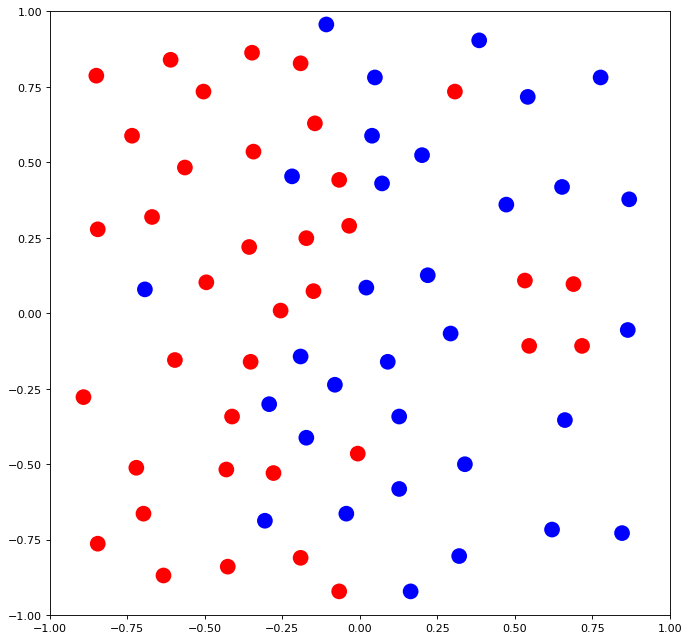

"plt.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.3)\nplt.show()"

In [19]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax1 = fig.add_subplot(111)

colors = ['red' if i==0 else 'blue' for i in Y]
ax1.scatter(X[:,0],X[:,1], c=colors, s=200, marker='o', linewidth=0)
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.show()
'''plt.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()'''

In [20]:
#X is the feature matrix, Y is the target matrix, x is the query point, tau is the bandwidth parameter.
def func (X, Y, x, tau):
    X_T = np.transpose(X) #n*m feature matrix transposed
    m = len(X) #m=69 data points
    n = len(X[0,:]) #n=2 features
    reg = 0.0001 #regularization parameter
    g = np.ones(n) #initialize the gradient

    theta = np.zeros(n) #n*1 parameter matrix

    exp = -1* np.square( np.linalg.norm( np.zeros((m,2))+x - X, axis=1) / (2*tau*tau) )
    w = np.exp ( exp ) # m*1 weight matrix

    while(np.linalg.norm(g)> 1e-6):

        h = 1 / (1+ np.exp( -1* np.dot( X, theta ) )) #m*1 hypothesis matrix

        #z = w*(Y-h)
        z = w*(Y-h)
        g = np.dot(X_T,z)-reg*theta #n*1 gradient

        D = np.diag( -1*w* h*(1-h))
        temp1=np.dot(X_T,D)
        H = np.dot(temp1,X)-reg*np.eye(n) #n*n Hessian matrix
        H_inv = np.linalg.inv(H)

        theta = theta - np.dot(H_inv,g)

    return int(np.dot(x,theta) > 0) #if the exponent is positive, h>0.5; if h>0.5 return 1!

In [21]:
# X is the feature matrix, Y is the target matrix tau is the bandwidth parameter
#grid is the grid of the model
def plot_func (X, Y, tau, grid):
    
    x0 = np.linspace(-1,1, num=grid) #feature 0
    x1 = np.linspace(-1,1, num=grid) #feature 1
    X_model = np.zeros((grid*grid,2))
    model = np.zeros(grid*grid)
    for i in range(0,grid):
        for j in range(0,grid):
            X_model[i*grid+j] = [x0[i],x1[j]]
            model[i*grid+j] = func(X, Y, [x0[i],x1[j]], tau)
            
    fig = plt.figure(figsize=(10,10), dpi=80)
    ax1 = fig.add_subplot(111)

    colors = ['red' if i==0 else 'blue' for i in Y] #for the true data
    ax1.scatter(X[:,0],X[:,1], c=colors, s=200, marker='o', linewidth=0, alpha=1)

    colors_model = ['red' if i==0 else 'blue' for i in model] #for the model
    ax1.scatter(X_model[:,0],X_model[:,1], c=colors_model, s=130, marker='s', alpha=0.35, linewidth=0)

    plt.ylim(-1,1)
    plt.xlim(-1,1)
    plt.show()
    
    #percent = str(np.sum(model)/len(model)*100)    
    #print("The graph is " + percent + "% blue. The bandwidth parameter is " + str(tau))

tau = 0.8


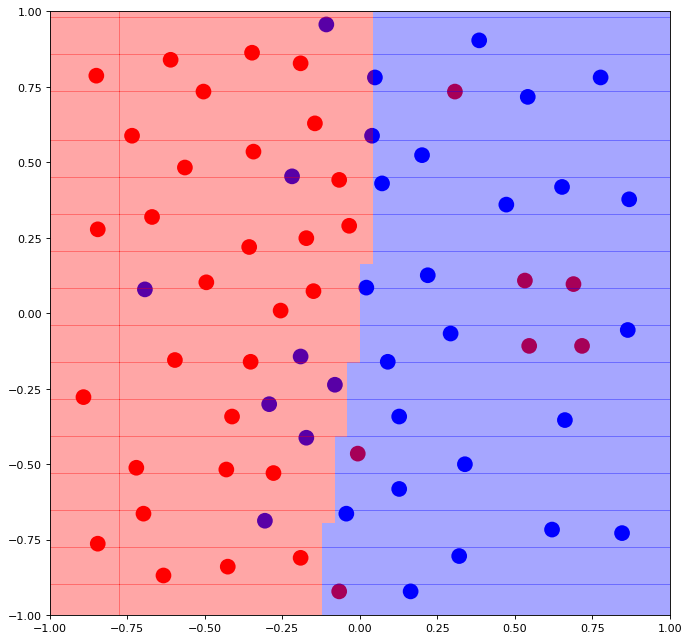

In [22]:
print("tau = 0.8")
plot_func(X,Y,0.8,50)
print("\n")

tau = 0.05


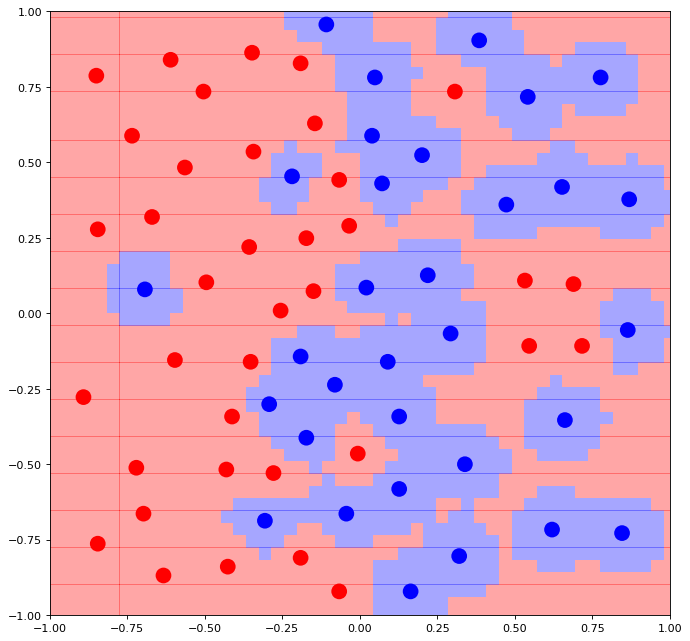



tau = 0.1


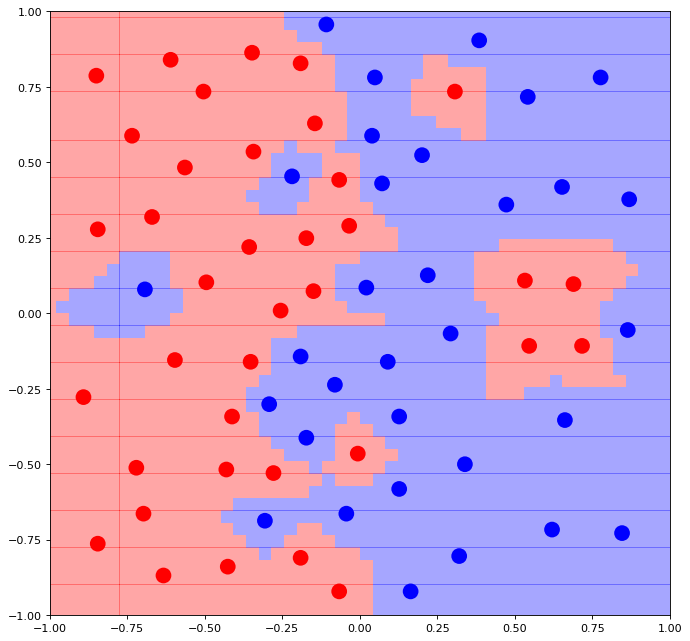



tau = 0.5


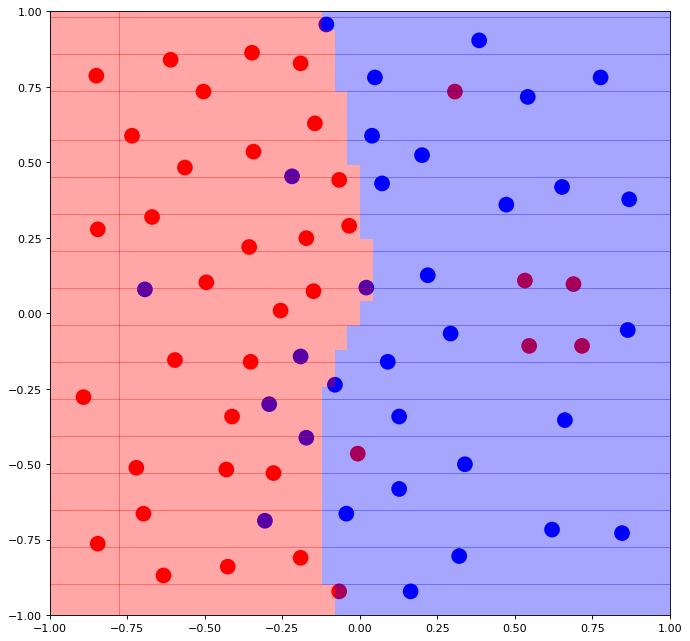



tau = 1


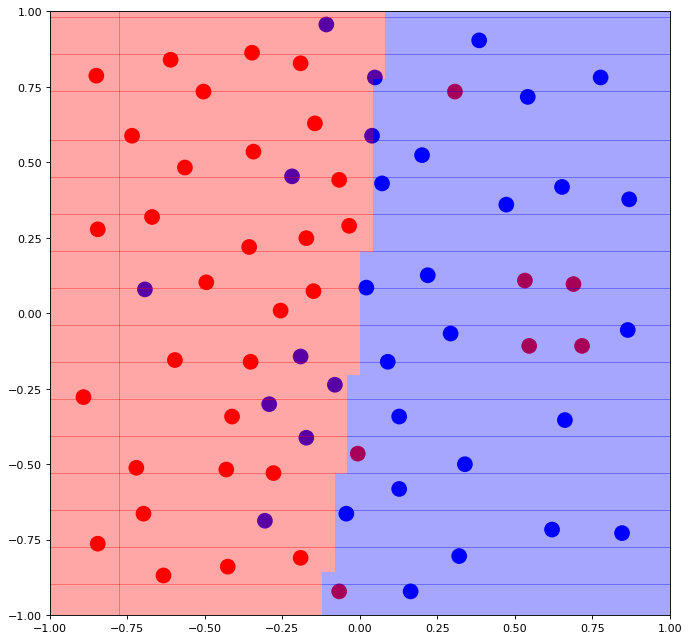



tau = 5


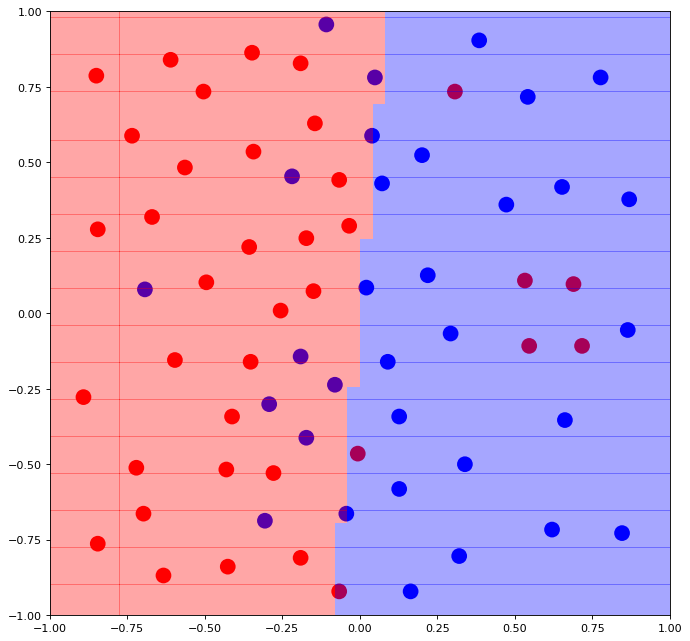

In [23]:
print("tau = 0.05")
plot_func(X,Y,0.05,50)
print("\n")

print("tau = 0.1")
plot_func(X,Y,0.1,50)
print("\n")

print("tau = 0.5")
plot_func(X,Y,0.5,50)
print("\n")

print("tau = 1")
plot_func(X,Y,1,50)
print("\n")

print("tau = 5")
plot_func(X,Y,5,50)

